In [1]:
import pandas as pd
import arff
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Loading the frequency data
with open('/Users/ayseljafarova/Desktop/Huk Coburg/freMTPL2freq.arff', 'r') as f:
    data_freq = arff.load(f)
df_freq = pd.DataFrame(data_freq['data'], columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
                                                   "VehAge", "DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])

# Loading the severity data
with open('/Users/ayseljafarova/Desktop/Huk Coburg/freMTPL2sev.arff', 'r') as f:
    data_sev = arff.load(f)
df_sev = pd.DataFrame(data_sev['data'], columns=["IDpol", "ClaimAmount"])

In [2]:
df_freq.head()

IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
0    1.0      1.0      0.10    D       5.0     0.0     55.0        50.0   
1    3.0      1.0      0.77    D       5.0     0.0     55.0        50.0   
2    5.0      1.0      0.75    B       6.0     2.0     52.0        50.0   
3   10.0      1.0      0.09    B       7.0     0.0     46.0        50.0   
4   11.0      1.0      0.84    B       7.0     0.0     46.0        50.0   

  VehBrand   VehGas  Density Region  
0      B12  Regular   1217.0    R82  
1      B12  Regular   1217.0    R82  
2      B12   Diesel     54.0    R22  
3      B12   Diesel     76.0    R72  
4      B12   Diesel     76.0    R72

In [3]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  float64
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  float64
 5   VehAge      678013 non-null  float64
 6   DrivAge     678013 non-null  float64
 7   BonusMalus  678013 non-null  float64
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  float64
 11  Region      678013 non-null  object 
dtypes: float64(8), object(4)
memory usage: 62.1+ MB


In [4]:
df_sev.head()

IDpol  ClaimAmount
0     1552.0       995.20
1  1010996.0      1128.12
2  4024277.0      1851.11
3  4007252.0      1204.00
4  4046424.0      1204.00

In [5]:
df_sev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  float64
 1   ClaimAmount  26639 non-null  float64
dtypes: float64(2)
memory usage: 416.4 KB


In [6]:
#Left join we want to keep all policies from freMTPL2freq, even if they have no claims
data = pd.merge(df_freq, df_sev, on='IDpol', how='left')
data.head()

IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
0    1.0      1.0      0.10    D       5.0     0.0     55.0        50.0   
1    3.0      1.0      0.77    D       5.0     0.0     55.0        50.0   
2    5.0      1.0      0.75    B       6.0     2.0     52.0        50.0   
3   10.0      1.0      0.09    B       7.0     0.0     46.0        50.0   
4   11.0      1.0      0.84    B       7.0     0.0     46.0        50.0   

  VehBrand   VehGas  Density Region  ClaimAmount  
0      B12  Regular   1217.0    R82          NaN  
1      B12  Regular   1217.0    R82          NaN  
2      B12   Diesel     54.0    R22          NaN  
3      B12   Diesel     76.0    R72          NaN  
4      B12   Diesel     76.0    R72          NaN

In [7]:
data.dropna(subset=['ClaimAmount'], inplace=True)
data['ClaimAmount'].value_counts()

ClaimAmount
1204.00    4792
1128.12    3056
1172.00    2071
1128.00     831
602.00      433
           ... 
783.92        1
489.72        1
832.33        1
63.28         1
576.53        1
Name: count, Length: 12255, dtype: int64

In [8]:
data["ClaimNb"].value_counts()

ClaimNb
1.0     23570
2.0      2597
3.0       186
11.0       22
4.0        20
16.0       16
5.0        10
9.0         9
8.0         8
6.0         6
Name: count, dtype: int64

In [9]:
idpol_counts = data['IDpol'].value_counts()
duplicated_idpol = idpol_counts[idpol_counts > 1].index
duplicate_rows = data[data['IDpol'].isin(duplicated_idpol)]

print(f'Number of duplicate rows: {duplicate_rows.shape[0]}')
duplicate_rows

Number of duplicate rows: 2873


IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  \
205         424.0      2.0      0.62    F      10.0     0.0     51.0   
206         424.0      2.0      0.62    F      10.0     0.0     51.0   
747        1552.0      2.0      0.59    D      11.0     0.0     39.0   
748        1552.0      2.0      0.59    D      11.0     0.0     39.0   
1005       2085.0      2.0      0.69    C       9.0     0.0     50.0   
...           ...      ...       ...  ...       ...     ...      ...   
676522  6111342.0      2.0      0.57    E       7.0     9.0     24.0   
678681  6113501.0      2.0      0.09    E       4.0     1.0     35.0   
678682  6113501.0      2.0      0.09    E       4.0     1.0     35.0   
679015  6113834.0      2.0      0.17    C      15.0     3.0     36.0   
679016  6113834.0      2.0      0.17    C      15.0     3.0     36.0   

        BonusMalus VehBrand   VehGas  Density Region  ClaimAmount  
205          100.0      B12  Regular  27000.0    R11       989.64  
206          100.0      B12  Regular  27000.0    R11      9844.36  
747           56.0      B12   Diesel    778.0    R22       995.20  
748           56.0      B12   Diesel    778.0    R22      1845.74  
1005          50.0      B12  Regular    353.0    R72      1469.88  
...            ...      ...      ...      ...    ...          ...  
676522        76.0      B12  Regular   2212.0    R82      7490.00  
678681        50.0      B12  Regular   3317.0    R93      7700.00  
678682        50.0      B12  Regular   3317.0    R93      1324.40  
679015        50.0      B12  Regular    181.0    R54     10290.00  
679016        50.0      B12  Regular    181.0    R54      1940.40  

[2873 rows x 13 columns]

In [10]:
columns_to_check = ['Region', 'VehGas', 'VehBrand', 'Area', 'VehPower', 'VehAge']

for column in columns_to_check:
    value_counts = data[column].value_counts().reset_index()
    value_counts.columns = [column, 'Count']
    display(value_counts)

Region  Count
0     R24   6475
1     R82   4233
2     R93   2986
3     R11   2591
4     R53   1871
5     R52   1576
6     R91   1068
7     R72   1055
8     R31    944
9     R54    800
10    R41    468
11    R25    452
12    R73    369
13    R26    345
14    R22    314
15    R23    220
16    R74    197
17    R83    141
18    R94    132
19    R42     92
20    R21     77
21    R43     38

VehGas  Count
0   Diesel  13450
1  Regular  12994

VehBrand  Count
0        B1   6898
1        B2   6805
2       B12   4200
3        B3   2429
4        B5   1662
5        B6   1252
6        B4   1099
7       B10    765
8       B11    664
9       B13    539
10      B14    131

Area  Count
0    C   7093
1    D   6458
2    E   6122
3    A   3364
4    B   2633
5    F    774

VehPower  Count
0        6.0   6305
1        7.0   5593
2        5.0   5115
3        4.0   4003
4        8.0   1645
5        9.0   1220
6       10.0   1217
7       11.0    714
8       12.0    296
9       13.0    139
10      14.0    101
11      15.0     96

VehAge  Count
0      1.0   2328
1      2.0   2238
2      3.0   1873
3      4.0   1793
4      5.0   1678
5      6.0   1671
6      7.0   1657
7     10.0   1643
8      9.0   1549
9      8.0   1489
10    12.0   1393
11    11.0   1386
12     0.0   1181
13    13.0   1092
14    14.0    981
15    15.0    828
16    16.0    544
17    17.0    419
18    18.0    243
19    19.0    139
20    20.0    112
21    21.0     54
22    22.0     38
23    23.0     24
24    24.0     19
25    25.0     18
26    26.0     14
27    28.0      7
28    30.0      7
29    36.0      5
30    35.0      4
31    27.0      3
32    32.0      3
33    31.0      2
34    29.0      2
35    33.0      2
36    39.0      2
37    99.0      1
38    69.0      1
39    84.0      1

In [11]:
data['TotalClaimAmount'] = data.groupby('IDpol')['ClaimAmount'].transform('sum')
data['TotalExposure'] = data.groupby('IDpol')['Exposure'].transform('sum')
data['AvgClaimAmountPerExposure'] = data['TotalClaimAmount'] / data['TotalExposure']
data['AvgClaimAmountPerExposure'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)

In [12]:
print(data.isnull().sum())
data.ClaimNb.value_counts()

IDpol                        0
ClaimNb                      0
Exposure                     0
Area                         0
VehPower                     0
VehAge                       0
DrivAge                      0
BonusMalus                   0
VehBrand                     0
VehGas                       0
Density                      0
Region                       0
ClaimAmount                  0
TotalClaimAmount             0
TotalExposure                0
AvgClaimAmountPerExposure    0
dtype: int64


ClaimNb
1.0     23570
2.0      2597
3.0       186
11.0       22
4.0        20
16.0       16
5.0        10
9.0         9
8.0         8
6.0         6
Name: count, dtype: int64

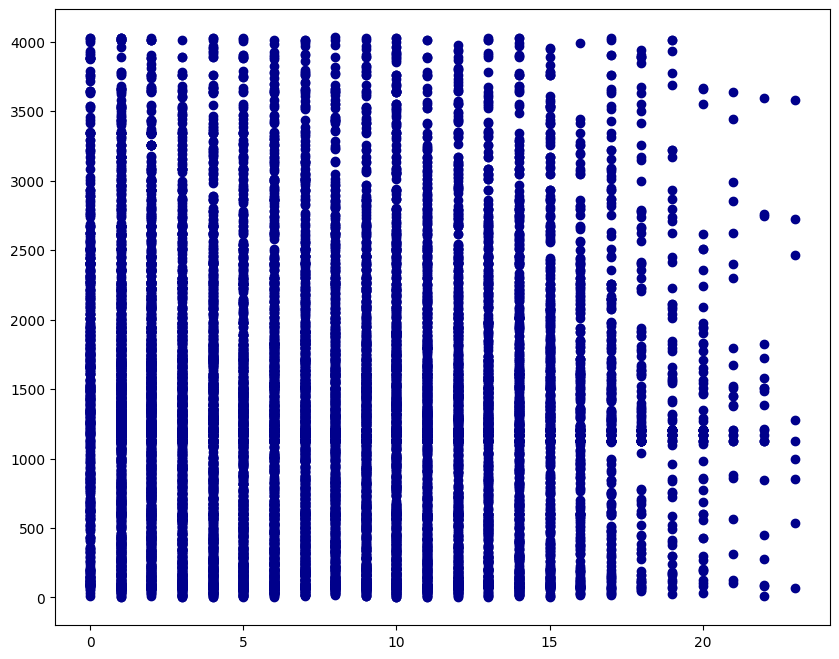

In [13]:
numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

plt.figure(figsize=(10, 8))
plt.scatter(data['VehAge'], data['AvgClaimAmountPerExposure'], color='darkblue')
plt.show()

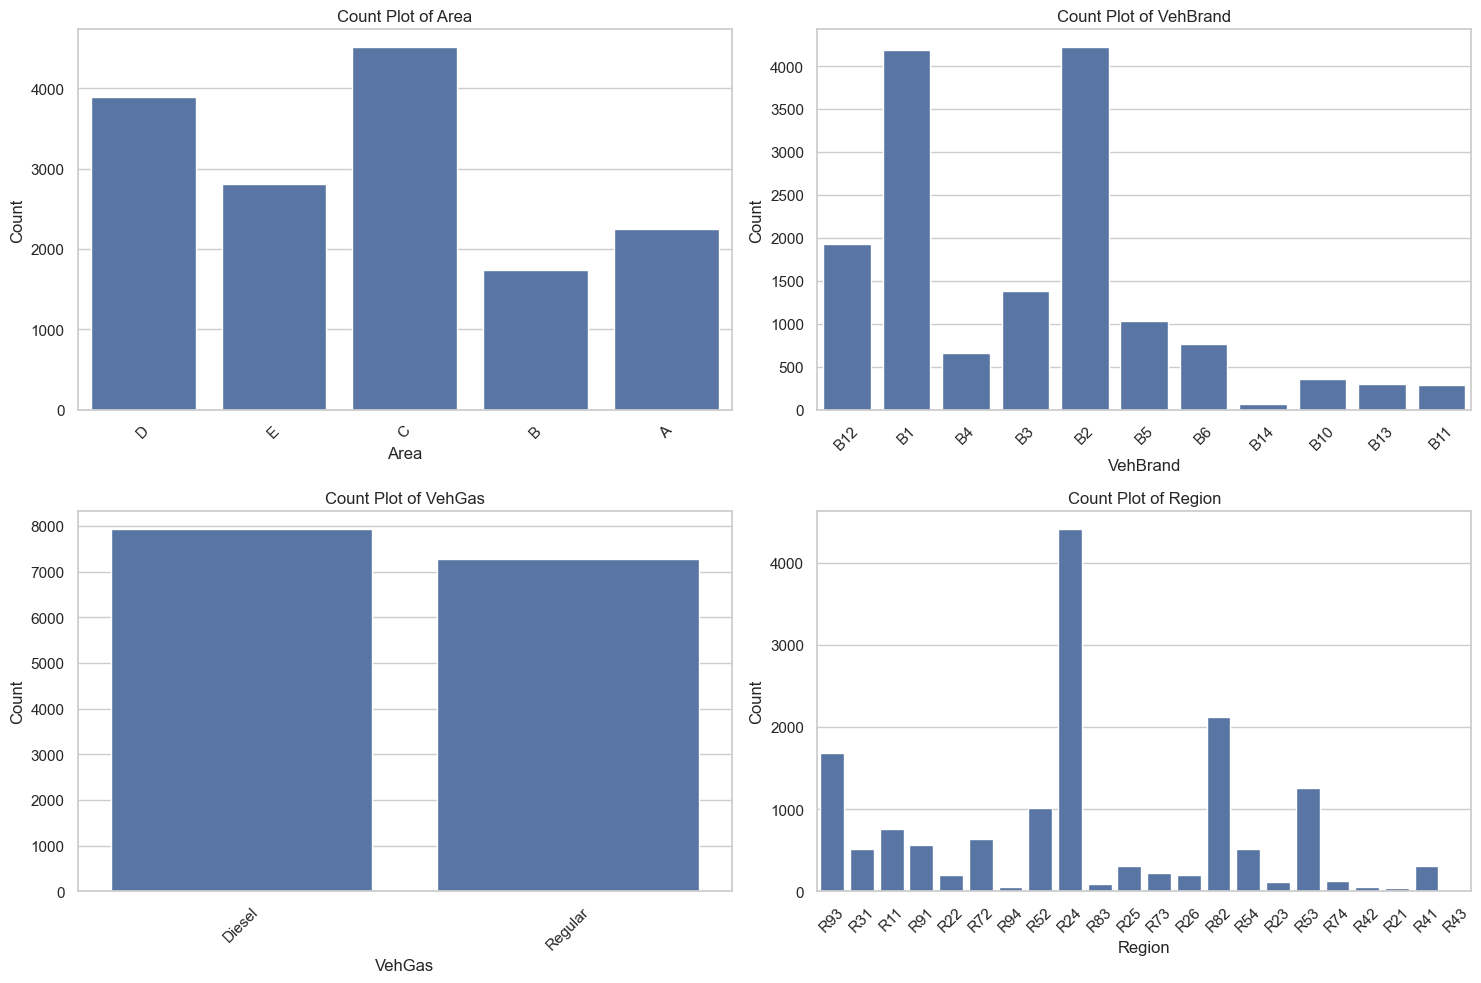

Random Forest Model:
Mean Squared Error: 491389.96408683143
R^2 Score: 0.3341791330640006
Training Score: 0.9028389599933876
Test Score: 0.3341791330640006

Lasso Model:
Mean Squared Error: 501086.10131396924
R^2 Score: 0.3210411144508193
Training Score: 0.3155311060988074
Test Score: 0.3210411144508193

Linear Regression Model:
Mean Squared Error: 501389.7234179618
R^2 Score: 0.3206297142447182
Training Score: 0.3156360147084204
Test Score: 0.3206297142447182


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, r2_score

categorical_cols = ['Area', 'VehBrand', 'VehGas', 'Region']

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

X = data.drop(columns=['AvgClaimAmountPerExposure', 'IDpol', "ClaimAmount", 'TotalExposure', 'TotalClaimAmount'])  
y = data['AvgClaimAmountPerExposure'] 

categorical_cols = ['Area', 'VehGas']
frequency_encoded_cols = ['Region', 'VehBrand']
numerical_cols = [col for col in X.columns if col not in categorical_cols + frequency_encoded_cols]

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lasso_model = Lasso(alpha=1.0, random_state=42)
linear_model = LinearRegression()

# Pipelines
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)])

lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', lasso_model)])

linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', linear_model)])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_pipeline.fit(X_train, y_train)
rf_y_pred = rf_pipeline.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_train_score = rf_pipeline.score(X_train, y_train)
rf_test_score = rf_pipeline.score(X_test, y_test)

print('Random Forest Model:')
print(f'Mean Squared Error: {rf_mse}')
print(f'R^2 Score: {rf_r2}')
print(f'Training Score: {rf_train_score}')
print(f'Test Score: {rf_test_score}')

# Lasso
lasso_pipeline.fit(X_train, y_train)
lasso_y_pred = lasso_pipeline.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_train_score = lasso_pipeline.score(X_train, y_train)
lasso_test_score = lasso_pipeline.score(X_test, y_test)

print('\nLasso Model:')
print(f'Mean Squared Error: {lasso_mse}')
print(f'R^2 Score: {lasso_r2}')
print(f'Training Score: {lasso_train_score}')
print(f'Test Score: {lasso_test_score}')

# Linear Regression
linear_pipeline.fit(X_train, y_train)
linear_y_pred = linear_pipeline.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)
linear_train_score = linear_pipeline.score(X_train, y_train)
linear_test_score = linear_pipeline.score(X_test, y_test)

print('\nLinear Regression Model:')
print(f'Mean Squared Error: {linear_mse}')
print(f'R^2 Score: {linear_r2}')
print(f'Training Score: {linear_train_score}')
print(f'Test Score: {linear_test_score}')

## Die Performance und die Metriken sind nicht so gut, könnten aber verbessert werden. Da meine Aufgabe nur das Modellieren war, habe ich nicht viel Zeit darauf verwendet, die Metriken oder die Datenvorverarbeitung zu verbessern

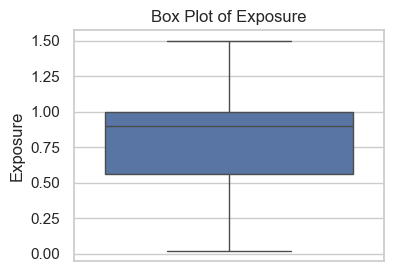

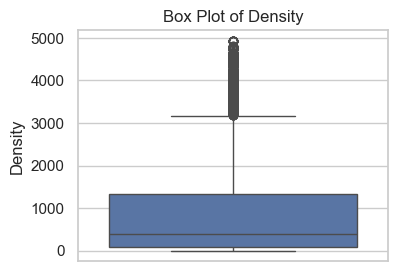

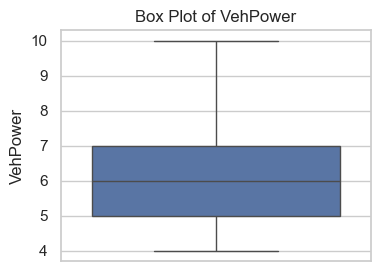

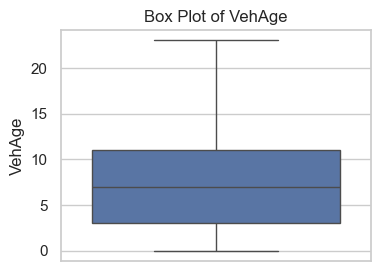

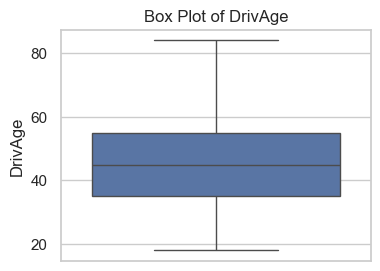

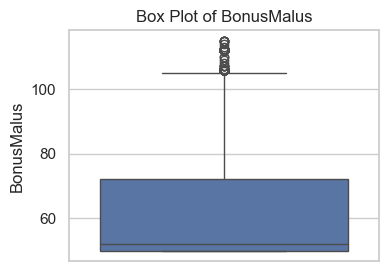

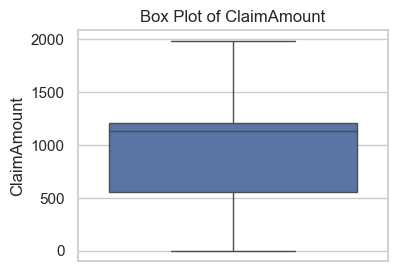

In [15]:
# List of numerical columns to plot
numerical_columns = ['Exposure', 'Density', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'ClaimAmount']
for column in numerical_columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(y=data[column].values)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

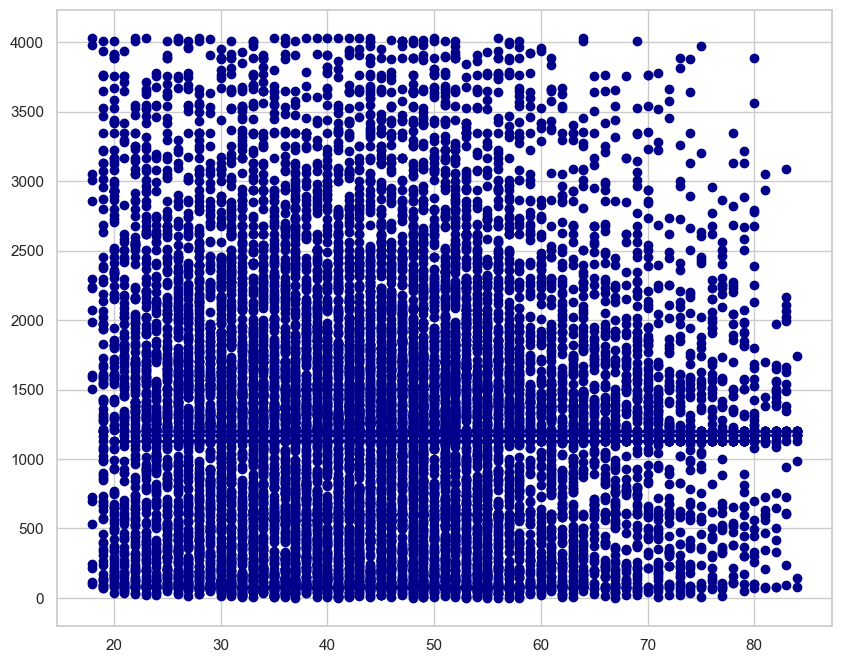

In [16]:
plt.figure(figsize= (10,8))
plt.scatter(data['DrivAge'], data.AvgClaimAmountPerExposure, color = 'darkblue');

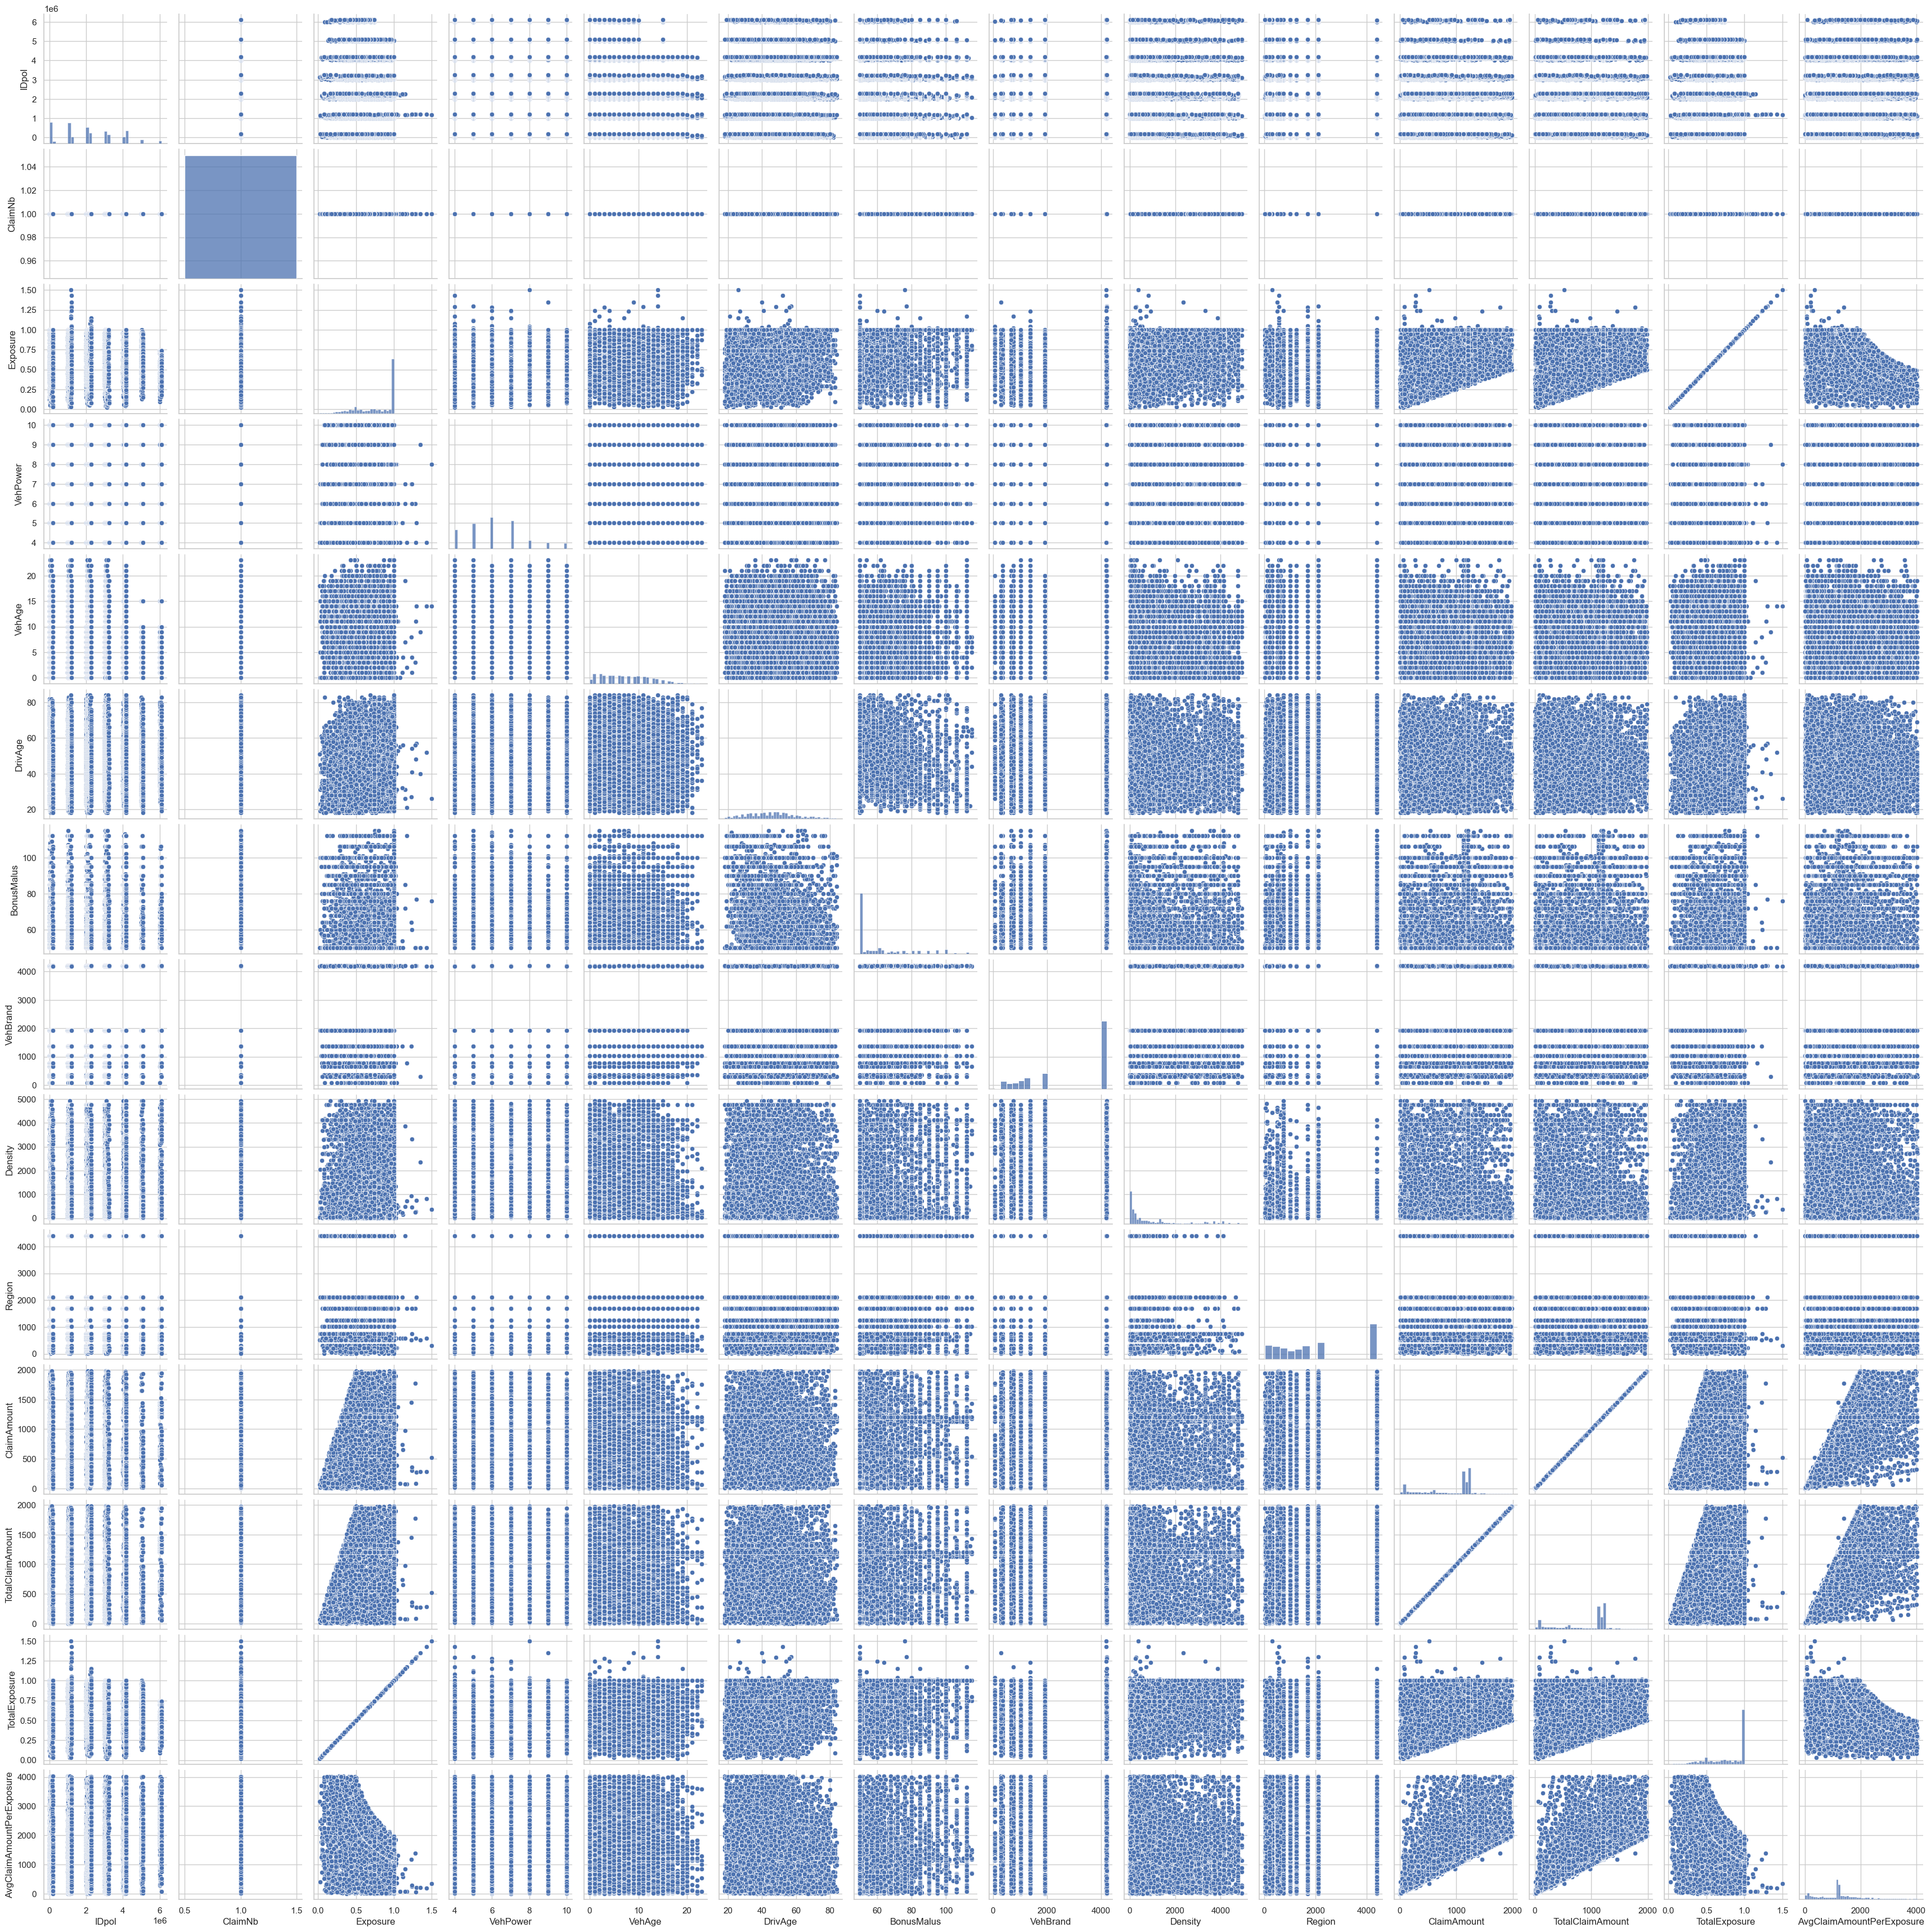

In [21]:
numerical_df = data.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numerical_df)
plt.show()

In [17]:

data = pd.get_dummies(data, columns=['Area', 'VehGas'], drop_first=True)
region_freq = data['Region'].value_counts().to_dict()
vehbrand_freq = data['VehBrand'].value_counts().to_dict()

data['Region'] = data['Region'].map(region_freq)
data['VehBrand'] = data['VehBrand'].map(vehbrand_freq)
data.head()

IDpol  ClaimNb  Exposure  VehPower  VehAge  DrivAge  BonusMalus  \
288  606.0      1.0      0.84      10.0     6.0     54.0        50.0   
296  622.0      1.0      0.75       5.0     0.0     34.0        64.0   
389  811.0      1.0      0.76       5.0     0.0     44.0        50.0   
397  830.0      1.0      0.68       4.0    10.0     24.0       105.0   
469  975.0      1.0      0.73       9.0     0.0     60.0        50.0   

     VehBrand  Density  Region  ClaimAmount  TotalClaimAmount  TotalExposure  \
288      1927    583.0    1682      1840.14           1840.14           0.84   
296      1927   1565.0     514      1397.97           1397.97           0.75   
389      1927   3317.0    1682       971.98            971.98           0.76   
397      4191   3064.0     753      1442.75           1442.75           0.68   
469      1927    570.0    1682       637.41            637.41           0.73   

     AvgClaimAmountPerExposure  Area_B  Area_C  Area_D  Area_E  VehGas_Regular  
288                2190.642857   False   False    True   False           False  
296                1863.960000   False   False    True   False            True  
389                1278.921053   False   False   False    True            True  
397                2121.691176   False   False   False    True            True  
469                 873.164384   False   False    True   False            True

Pearson Correlation Matrix:


IDpol  ClaimNb  Exposure  VehPower    VehAge  \
IDpol                      1.000000      NaN -0.082053  0.020941 -0.076023   
ClaimNb                         NaN      NaN       NaN       NaN       NaN   
Exposure                  -0.082053      NaN  1.000000 -0.020479  0.013747   
VehPower                   0.020941      NaN -0.020479  1.000000  0.012132   
VehAge                    -0.076023      NaN  0.013747  0.012132  1.000000   
DrivAge                    0.064326      NaN  0.193303  0.012681 -0.064521   
BonusMalus                -0.027442      NaN -0.161924 -0.030951  0.118526   
VehBrand                  -0.081139      NaN  0.068244 -0.109013  0.133775   
Density                    0.018382      NaN -0.077299 -0.021042 -0.023750   
Region                    -0.083968      NaN  0.078189  0.007583  0.124346   
ClaimAmount                0.121164      NaN  0.119812  0.016501 -0.007242   
TotalClaimAmount           0.121164      NaN  0.119812  0.016501 -0.007242   
TotalExposure             -0.082053      NaN  1.000000 -0.020479  0.013747   
AvgClaimAmountPerExposure  0.136028      NaN -0.554405  0.017144 -0.013733   
Area_B                    -0.012225      NaN  0.037788  0.009350  0.023987   
Area_C                    -0.005932      NaN  0.029234  0.006606 -0.025528   
Area_D                     0.007689      NaN -0.034364  0.007831 -0.008033   
Area_E                     0.018907      NaN -0.067698 -0.028223 -0.024946   
VehGas_Regular            -0.036889      NaN -0.005245 -0.070953  0.108171   

                            DrivAge  BonusMalus  VehBrand   Density    Region  \
IDpol                      0.064326   -0.027442 -0.081139  0.018382 -0.083968   
ClaimNb                         NaN         NaN       NaN       NaN       NaN   
Exposure                   0.193303   -0.161924  0.068244 -0.077299  0.078189   
VehPower                   0.012681   -0.030951 -0.109013 -0.021042  0.007583   
VehAge                    -0.064521    0.118526  0.133775 -0.023750  0.124346   
DrivAge                    1.000000   -0.471241  0.056526 -0.042060  0.032916   
BonusMalus                -0.471241    1.000000 -0.008373  0.090205  0.001463   
VehBrand                   0.056526   -0.008373  1.000000 -0.082789  0.115839   
Density                   -0.042060    0.090205 -0.082789  1.000000 -0.179028   
Region                     0.032916    0.001463  0.115839 -0.179028  1.000000   
ClaimAmount                0.094735    0.044503 -0.005307 -0.008246 -0.027130   
TotalClaimAmount           0.094735    0.044503 -0.005307 -0.008246 -0.027130   
TotalExposure              0.193303   -0.161924  0.068244 -0.077299  0.078189   
AvgClaimAmountPerExposure -0.043926    0.123505 -0.037804  0.043151 -0.076481   
Area_B                     0.009004   -0.024720  0.036455 -0.259499  0.056385   
Area_C                     0.026574   -0.053828  0.012742 -0.378942 -0.009450   
Area_D                    -0.028357    0.042365 -0.044039  0.038464 -0.085282   
Area_E                    -0.032769    0.072439 -0.065579  0.903995 -0.147702   
VehGas_Regular             0.061544    0.035058  0.002446  0.108322 -0.024207   

                           ClaimAmount  TotalClaimAmount  TotalExposure  \
IDpol                         0.121164          0.121164      -0.082053   
ClaimNb                            NaN               NaN            NaN   
Exposure                      0.119812          0.119812       1.000000   
VehPower                      0.016501          0.016501      -0.020479   
VehAge                       -0.007242         -0.007242       0.013747   
DrivAge                       0.094735          0.094735       0.193303   
BonusMalus                    0.044503          0.044503      -0.161924   
VehBrand                     -0.005307         -0.005307       0.068244   
Density                      -0.008246         -0.008246      -0.077299   
Region                       -0.027130         -0.027130       0.078189   
ClaimAmount            


Spearman Correlation Matrix:


IDpol  ClaimNb  Exposure  VehPower    VehAge  \
IDpol                      1.000000      NaN -0.085246  0.020560 -0.050430   
ClaimNb                         NaN      NaN       NaN       NaN       NaN   
Exposure                  -0.085246      NaN  1.000000 -0.018121  0.041017   
VehPower                   0.020560      NaN -0.018121  1.000000  0.011205   
VehAge                    -0.050430      NaN  0.041017  0.011205  1.000000   
DrivAge                    0.055706      NaN  0.200623  0.023314 -0.073229   
BonusMalus                -0.036822      NaN -0.153494 -0.029381  0.110543   
VehBrand                  -0.036687      NaN  0.065207 -0.095246  0.099862   
Density                    0.018092      NaN -0.093617 -0.023146 -0.040363   
Region                    -0.060934      NaN  0.093792  0.018297  0.120278   
ClaimAmount                0.279940      NaN  0.059183  0.017927 -0.022011   
TotalClaimAmount           0.279940      NaN  0.059183  0.017927 -0.022011   
TotalExposure             -0.085246      NaN  1.000000 -0.018121  0.041017   
AvgClaimAmountPerExposure  0.170124      NaN -0.495290  0.018579 -0.029953   
Area_B                    -0.012512      NaN  0.037432  0.011743  0.025287   
Area_C                    -0.003172      NaN  0.032512  0.006390 -0.026492   
Area_D                     0.004114      NaN -0.039274  0.004926 -0.004854   
Area_E                     0.018919      NaN -0.070976 -0.031319 -0.024973   
VehGas_Regular            -0.044199      NaN -0.000760 -0.086135  0.102011   

                            DrivAge  BonusMalus  VehBrand   Density    Region  \
IDpol                      0.055706   -0.036822 -0.036687  0.018092 -0.060934   
ClaimNb                         NaN         NaN       NaN       NaN       NaN   
Exposure                   0.200623   -0.153494  0.065207 -0.093617  0.093792   
VehPower                   0.023314   -0.029381 -0.095246 -0.023146  0.018297   
VehAge                    -0.073229    0.110543  0.099862 -0.040363  0.120278   
DrivAge                    1.000000   -0.494851  0.057769 -0.050253  0.036547   
BonusMalus                -0.494851    1.000000 -0.021554  0.097379 -0.010353   
VehBrand                   0.057769   -0.021554  1.000000 -0.094637  0.080906   
Density                   -0.050253    0.097379 -0.094637  1.000000 -0.171539   
Region                     0.036547   -0.010353  0.080906 -0.171539  1.000000   
ClaimAmount                0.096418    0.027880 -0.009936 -0.003506 -0.035601   
TotalClaimAmount           0.096418    0.027880 -0.009936 -0.003506 -0.035601   
TotalExposure              0.200623   -0.153494  0.065207 -0.093617  0.093792   
AvgClaimAmountPerExposure -0.026143    0.110305 -0.029364  0.046035 -0.078471   
Area_B                     0.008348   -0.024329  0.033187 -0.366781  0.036156   
Area_C                     0.028493   -0.055140  0.010681 -0.200148 -0.009198   
Area_D                    -0.026657    0.040305 -0.038582  0.379847 -0.063558   
Area_E                    -0.035309    0.076853 -0.057262  0.672662 -0.097200   
VehGas_Regular             0.050732    0.019662 -0.012321  0.126956 -0.011939   

                           ClaimAmount  TotalClaimAmount  TotalExposure  \
IDpol                         0.279940          0.279940      -0.085246   
ClaimNb                            NaN               NaN            NaN   
Exposure                      0.059183          0.059183       1.000000   
VehPower                      0.017927          0.017927      -0.018121   
VehAge                       -0.022011         -0.022011       0.041017   
DrivAge                       0.096418          0.096418       0.200623   
BonusMalus                    0.027880          0.027880      -0.153494   
VehBrand                     -0.009936         -0.009936       0.065207   
Density                      -0.003506         -0.003506      -0.093617   
Region                       -0.035601         -0.035601       0.093792   
ClaimAmount            

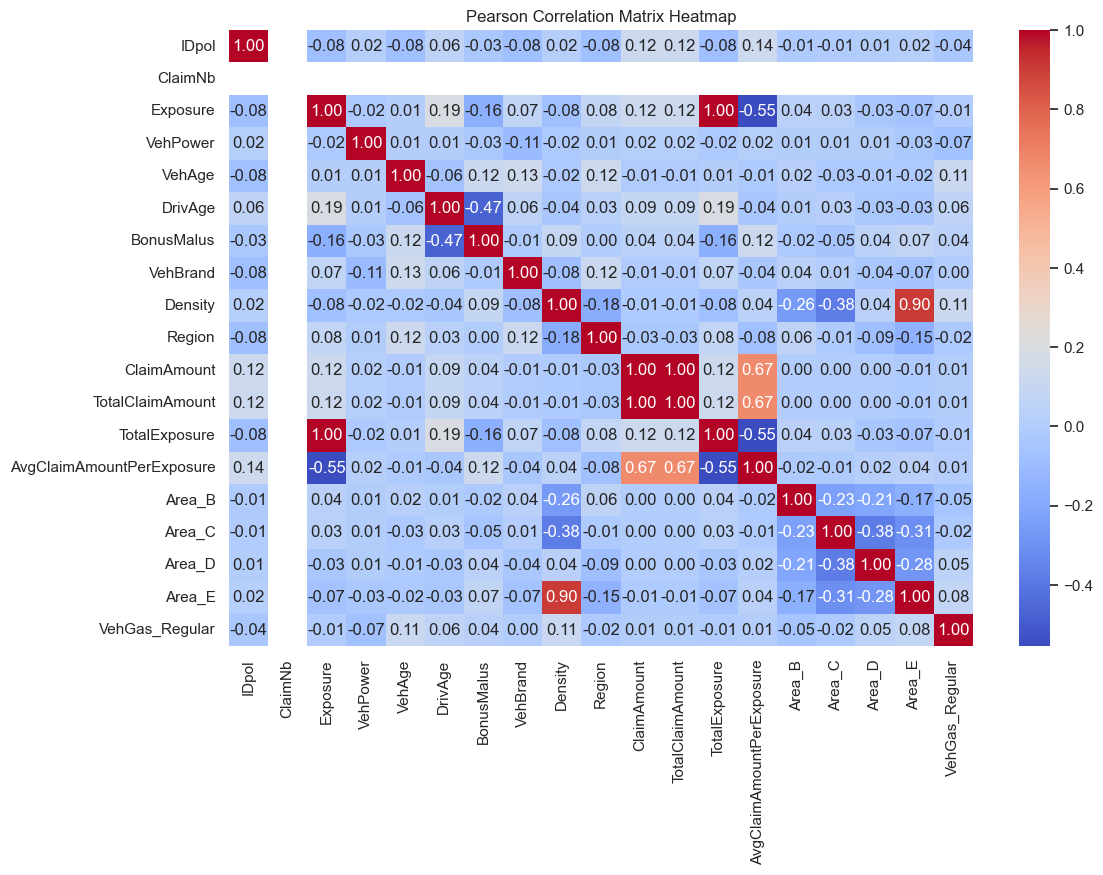

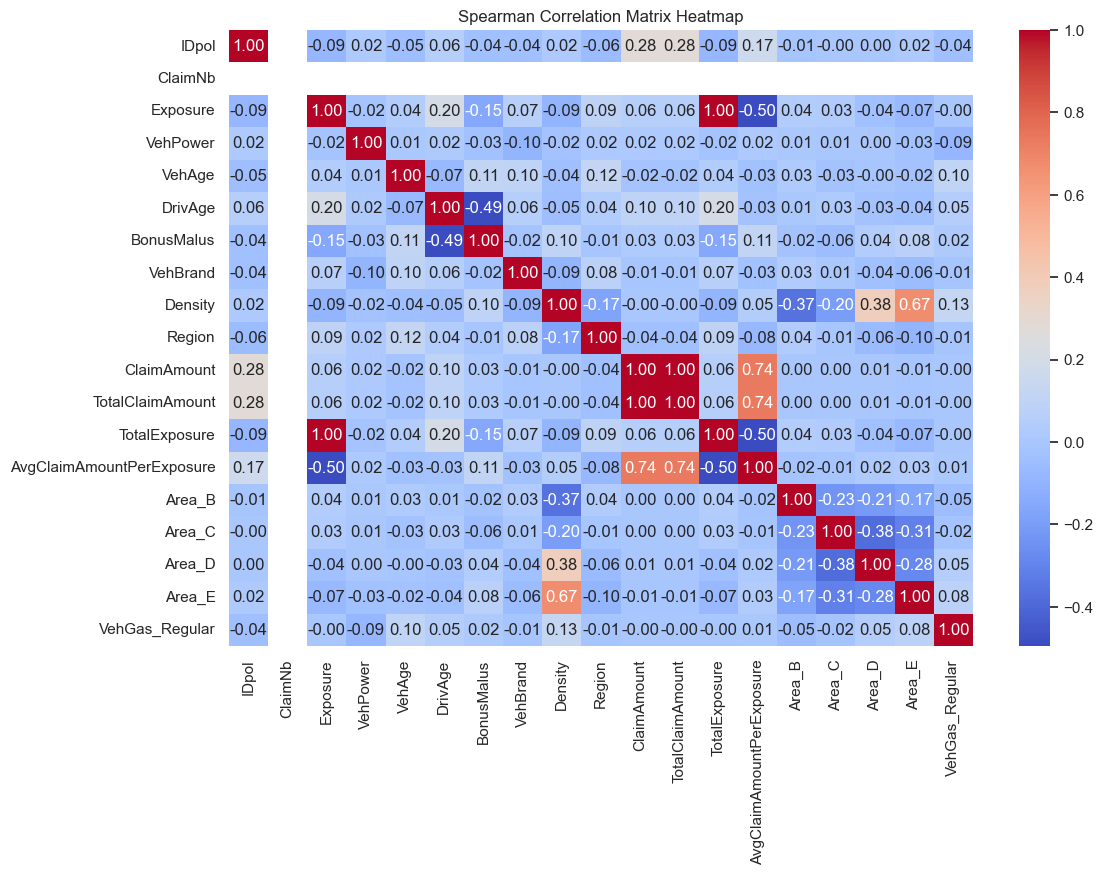

In [18]:
pearson_corr = data.corr(method='pearson')
spearman_corr = data.corr(method='spearman')
print("Pearson Correlation Matrix:")
display(pearson_corr)

print("\nSpearman Correlation Matrix:")
display(spearman_corr)

plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

In [24]:
# Extract the trained model from the pipeline
trained_model = rf_pipeline.named_steps['model']
feature_importances = trained_model.feature_importances_
print(feature_importances)

[0.         0.41778505 0.06146206 0.10505099 0.13007426 0.0727086
 0.16576918 0.00691424 0.00865819 0.00801749 0.0031968  0.02036313]
